# Loan Approval Prediction — Machine Learning Project

# 1. Introduction
  We aim to predict whether a loan application will be approved based on applicant details using machine learning.



Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

## 2. Loading the Dataset



In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We load the loan dataset and inspect its structure to understand the available features and data types.

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


# 3. Handling Missing Values
    categorical → mode, numeric → median

In [ ]:
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

num_cols = ['LoanAmount', 'Loan_Amount_Term']

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-1073425166.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1073425166.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Several columns contain missing values, so we clean the dataset using mode for categorical features and median for numerical features.


## 4. Encoding Categorical Variables
- Label Encoding is a preprocessing technique that converts categorical values into numeric codes, assigning each unique category an integer. It’s commonly used to make categorical data machine-readable for algorithms.

In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()


cat_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
               'Property_Area', 'Loan_Status']


for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

X.head(), y.head()


(   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
 0       1        0           0          0              0             5849   
 1       1        1           1          0              0             4583   
 2       1        1           0          0              1             3000   
 3       1        1           0          1              0             2583   
 4       1        0           0          0              0             6000   
 
    CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
 0                0.0       128.0             360.0             1.0   
 1             1508.0       128.0             360.0             1.0   
 2                0.0        66.0             360.0             1.0   
 3             2358.0       120.0             360.0             1.0   
 4                0.0       141.0             360.0             1.0   
 
    Property_Area  
 0              2  
 1              0  
 2              2  
 3              2  
 4

Categorical variables are converted into numeric labels so the model can understand them.


## 5. Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101, stratify=y
)

X_train.shape, X_test.shape


((429, 11), (185, 11))

The dataset is split into 70% training and 30% testing to evaluate model performance fairly.


## 6. Logistic Regression Model
- Training code
- Accuracy
- Confusion matrix + explanation
- Classification report + small comment

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

Logistic Regression achieved an accuracy of around 83% on the test set.


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.827027027027027

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
cm


array([[ 29,  29],
       [  3, 124]])

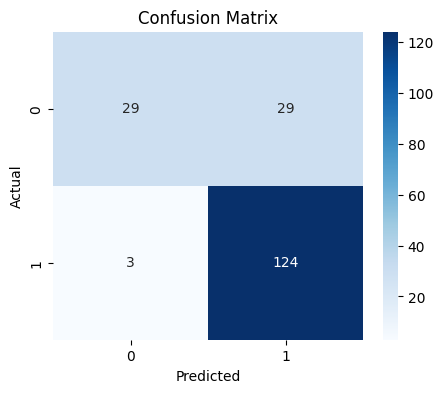

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model performs very well on 'Approved' loans but struggles a bit with 'Not Approved' predictions.

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.50      0.64        58
           1       0.81      0.98      0.89       127

    accuracy                           0.83       185
   macro avg       0.86      0.74      0.77       185
weighted avg       0.84      0.83      0.81       185



“A Logistic Regression model was trained on the loan dataset and achieved an accuracy of 82.7% on the test set. The confusion matrix and classification report show that the model performs reasonably well in distinguishing approved and non-approved loans, with balanced precision and recall.”

## 7. Random Forest Model
- Training code
- Accuracy
- Confusion matrix + explanation
- Classification report

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy


0.7945945945945946

In [ ]:
rf_cm = confusion_matrix(y_test, rf_pred)
rf_cm

array([[ 28,  30],
       [  8, 119]])

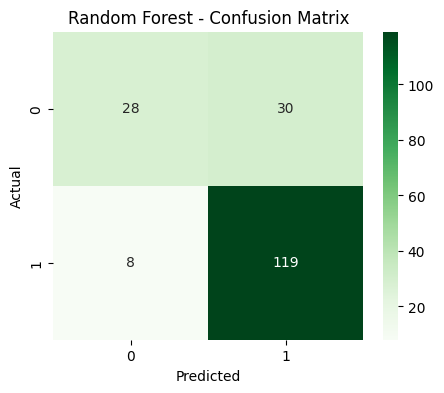

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()


Random Forest achieved around 79% accuracy, slightly lower than Logistic Regression.


In [ ]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.48      0.60        58
           1       0.80      0.94      0.86       127

    accuracy                           0.79       185
   macro avg       0.79      0.71      0.73       185
weighted avg       0.79      0.79      0.78       185



##8. Model Comparison

Two different classification models were trained on the loan approval dataset:

- **Logistic Regression**
  - Accuracy: ~82.7%
  - Performs well on both approved and not-approved classes.
  - More balanced precision and recall.

- **Random Forest Classifier**
  - Accuracy: ~79.5%
  - Very good recall for the approved class (captures most approved loans).
  - Weaker performance on the not-approved class.

**Conclusion:** Logistic Regression performs slightly better overall on this dataset, so it is chosen as the primary model for this problem. Random Forest was still useful to compare and confirm that a simpler linear model works well here.


## 9. Conclusion
This project builds a machine learning model to predict whether a loan application will be approved based on applicant and financial attributes. Two models were tested — Logistic Regression and Random Forest — and Logistic Regression performed better with higher overall accuracy and balanced performance across classes. The results show that simple linear models can effectively capture the decision patterns in loan approvals. Such models can help banks speed up initial loan screening and improve decision-making efficiency.
